<a href="https://colab.research.google.com/github/ab2gbl/Master2/blob/main/MLCI/TP/MLCI_TP3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical


In [2]:
# Charger le jeu de données
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normaliser les données
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Reshaper les données pour les adapter à l'entrée du CNN (ajouter une dimension pour les canaux)
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Convertir les labels en one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


In [4]:
model = Sequential()

# Couche de convolution
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))

# Pooling
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten
model.add(Flatten())

# Couche entièrement connectée
model.add(Dense(128, activation='relu'))

# Couche de sortie
model.add(Dense(10, activation='softmax'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [6]:
model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 32s 65ms/step - accuracy: 0.7832 - loss: 0.6434 - val_accuracy: 0.8672 - val_loss: 0.3582
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 66ms/step - accuracy: 0.8919 - loss: 0.3047 - val_accuracy: 0.8900 - val_loss: 0.2975
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 29s 62ms/step - accuracy: 0.9091 - loss: 0.2532 - val_accuracy: 0.8926 - val_loss: 0.2924
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 64ms/step - accuracy: 0.9205 - loss: 0.2236 - val_accuracy: 0.8986 - val_loss: 0.2737
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 29s 61ms/step - accuracy: 0.9275 - loss: 0.2005 - val_accuracy: 0.9025 - val_loss: 0.2717
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 43s 65ms/step - accuracy: 0.9367 - loss: 0.1773 - val_accuracy: 0.9086 - val_loss: 0.2578
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 39s 60ms/step - accuracy: 0.9399 - loss: 0.1627 - val_accuracy: 0.9162 - val_loss: 0.2404
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 28s 61ms/step - accuracy: 0.9494 - loss: 0.1412 - 

In [7]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9069 - loss: 0.2889
Test accuracy: 90.88%


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


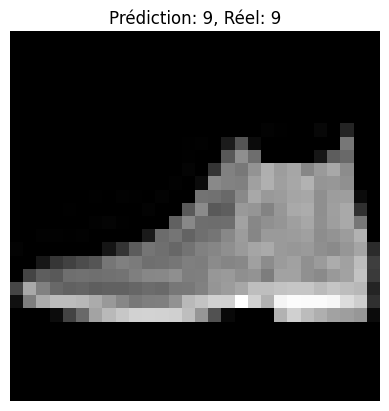

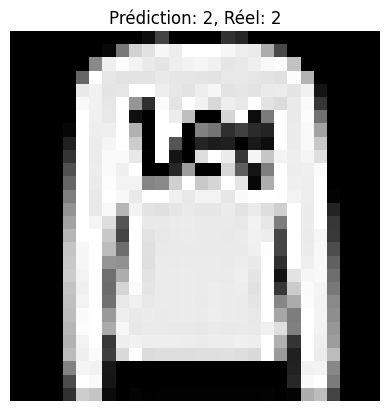

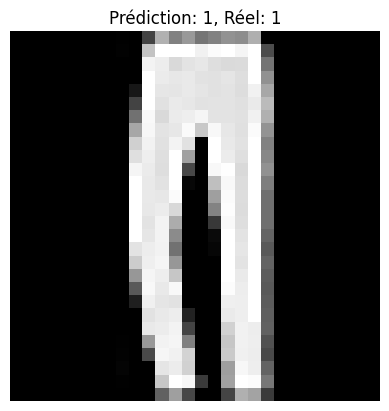

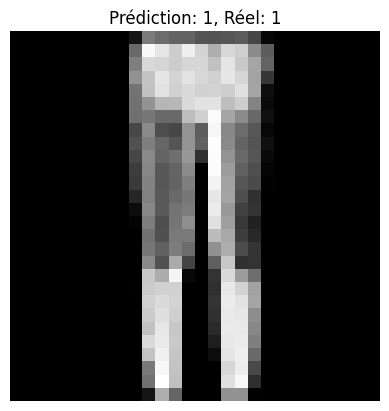

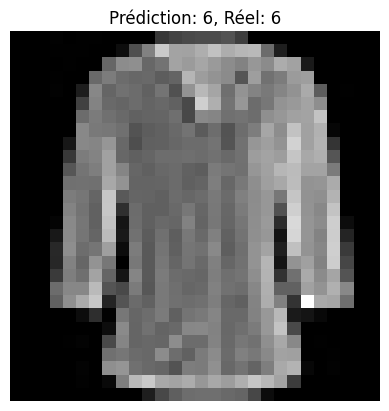

In [8]:
predictions = model.predict(x_test)

# Visualiser quelques images et leurs prédictions
for i in range(5):
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Prédiction: {np.argmax(predictions[i])}, Réel: {np.argmax(y_test[i])}")
    plt.axis('off')
    plt.show()
